In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
import torch
import time
import pickle


import runner
import agent

from graph import Graph
from baselines import BSSRPMIP
from baselines import NearestNeighboursHeuristic

from environment import Environment

from utils.evaluation_utils import *

In [3]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#devide = torch.device("cpu")

In [4]:
m = gp.Model()

Set parameter Username


2021-12-01 08:50:20,585:INFO:Set parameter Username


Academic license - for non-commercial use only - expires 2022-01-29


2021-12-01 08:50:20,586:INFO:Academic license - for non-commercial use only - expires 2022-01-29


### Generate Graph

In [5]:
seed = 12343

In [6]:
use_penalties = True
no_bikes_leaving = True

In [7]:
num_nodes = 10
num_vehicles = 3
time_limit = 35

k_nn = 5

penalty_cost_demand = 5
penalty_cost_time = 5
bike_load_time = 0

max_load = 10
max_demand = 9

fixed_bikes_leaving = True
starting_fraction = 0.5

speed = 30 

In [8]:
g = Graph(
        num_nodes = num_nodes, 
        k_nn = k_nn, 
        num_vehicles = num_vehicles,
        penalty_cost_demand = penalty_cost_demand,
        penalty_cost_time = penalty_cost_time, 
        starting_fraction=starting_fraction,
        speed = speed,
        bike_load_time=bike_load_time,
        time_limit = time_limit)

#### Model Parameters

In [9]:
agent_path = '../trained_models/model_10_node.pt'

rl_agent = agent.Agent('GATv2', 0, 1, 1000)
rl_agent.load_model(agent_path)

rl_agent.epsilon_ = 0.0
rl_agent.epsilon_min = 0.0
rl_agent.cpu()

rl_agent

In [10]:
mip_params = {
    "use_penalties" : True,
    "fixed_bikes_leaving" : True,
    "silent" : True,
    "solver_time_limit" : 120,
    "solver_gap_limit" : 0.01,
    "visit_all" : True,
}

### Evaluate

In [11]:
n_instances = 100

In [12]:
results = evaluate(g, n_instances, seed, rl_agent, mip_params)

Instance: 10/100
Instance: 20/100
Instance: 30/100
Instance: 40/100
Instance: 50/100
Instance: 60/100
Instance: 70/100
Instance: 80/100
Instance: 90/100
Instance: 100/100


In [13]:
print_results(results)

Reward:
  MIP:  -123.49147334694862 
  NN:   -216.55997037887573 
  RL:   -229.74641444190638 
Solving Time:
  MIP:  1.046646921634674 
  NN:   7.991075515747071e-05 
  RL:   0.0204494047164917 


In [14]:
get_reward_stats(results)

MIP Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -79.26279762999339   | 14.340332226357283          
  Demands:     | -9.800000190734863 | 9.484724998474121
  Overage:     | -34.428675480043786 | 39.004524212650075 

NN Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -99.73124433851977   | 23.412807374149292          
  Demands:     | -46.29999923706055 | 30.055112838745117
  Overage:     | -70.52872632732587 | 48.43945929264637 

RL Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -77.46001784817453   | 12.496490644894742          
  Demands:     | -76.19999694824219 | 49.10763931274414
  Overage:     | -76.08639617184045 | 64.95897460211887 



In [15]:
get_optimality_gaps(results, n_instances, rl_agent)

  Method      | Gap  (%)            
  ----------------------------------
  MIP:        | 0.0 
  NN:         | 77.73197624977328 
  RL:         | 99.45473139172321 


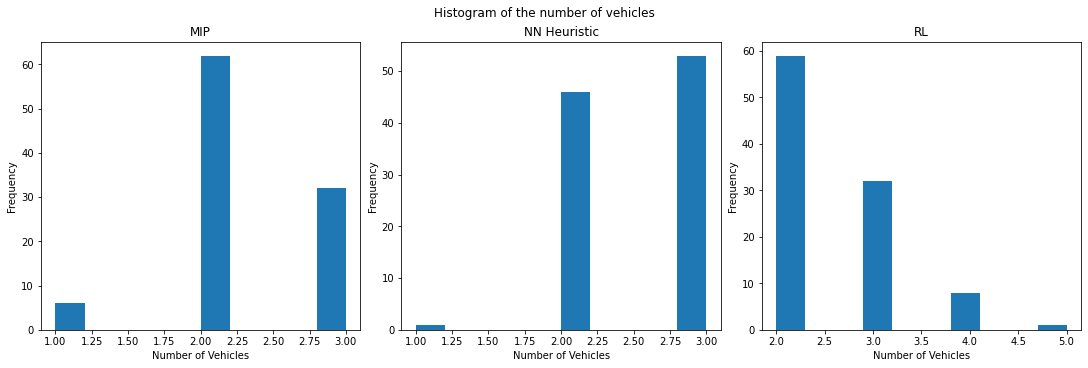

In [16]:
plot_num_routes(results, rl_agent)

### Render

In [17]:
seed = 123
save_path = f'../rl_results/'

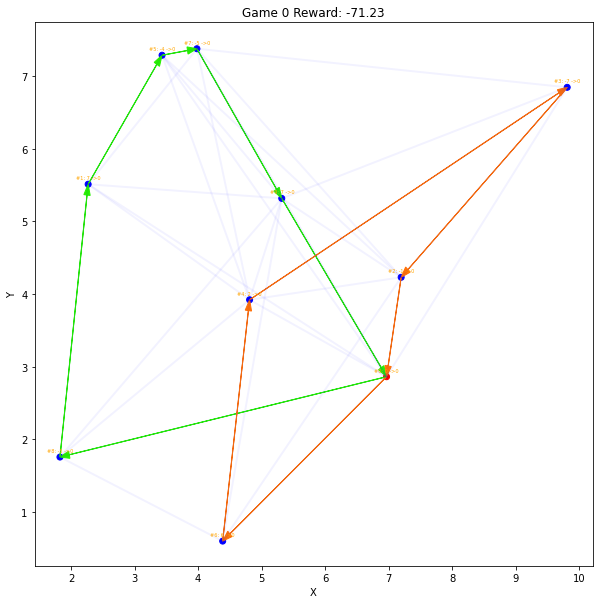

In [18]:
render_mip(g, seed, mip_params, save_path + f"render_mip_n{num_nodes}_s{seed}.jpg")

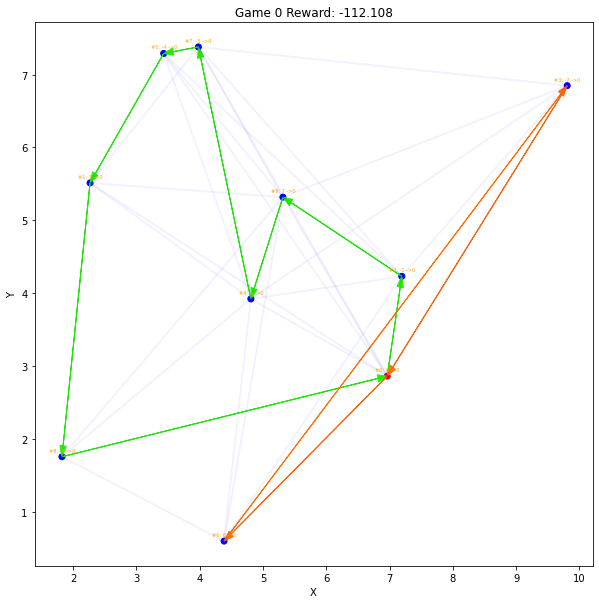

In [19]:
render_nn(g, seed, mip_params, save_path + f"render_nn_n{num_nodes}_s{seed}.jpg")

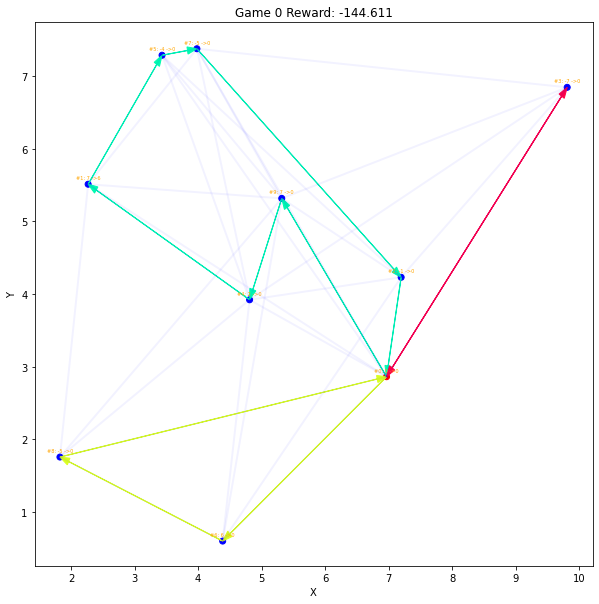

In [20]:
render_rl(g, seed, rl_agent, save_path + f"render_rl_n{num_nodes}_s{seed}.jpg")

### Save results

In [21]:
with open(f'../evaluation_results/{num_nodes}_nodes.pickle', 'wb') as p:
    pickle.dump(results, p)